In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt

Initial Conditions:  [0.07454012 0.08660567 0.08521366 0.09184818]


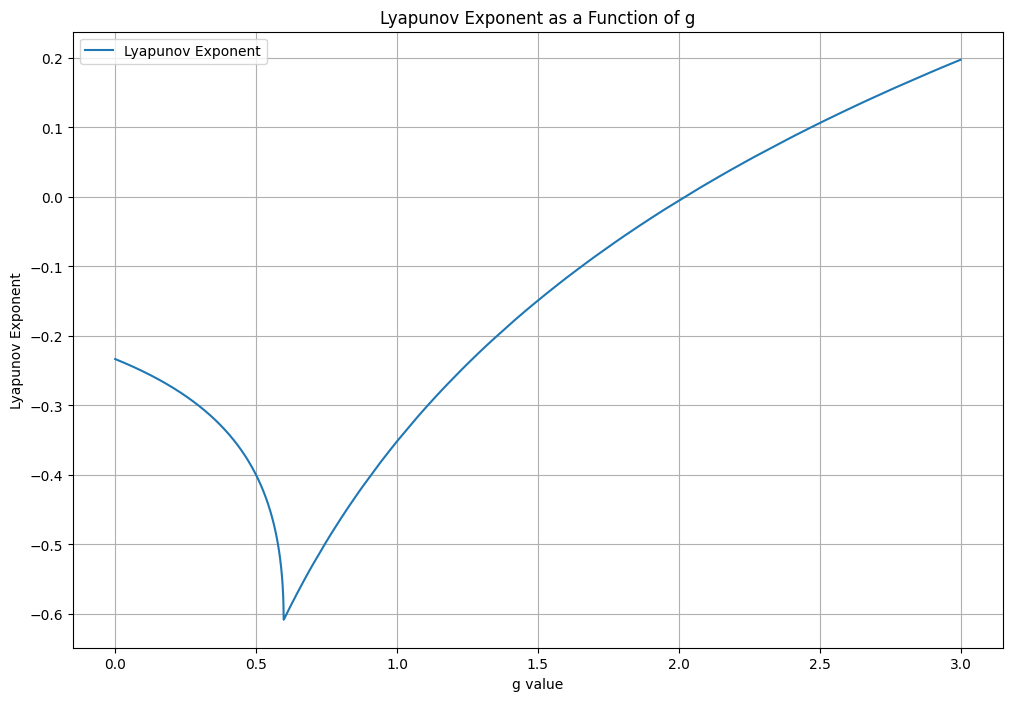

In [44]:
# Compute the Jacobian matrix for the dynamical system at the fixed point (It was found in the previous question)
def jacobian_matrix(g, R=1.01, v=0.6):
    J = np.array([
        [(1 + v + g) / (2 * R), -g / (2 * R), 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]
    ])
    return J

# Iterate the system using the Jacobian matrix and compute the Lyapunov exponent.
def iterate_system(J, initial_condition, n_iterations):
    x = initial_condition
    lyapunov_sum = 0
    for i in range(n_iterations):
        x = J @ x  # Matrix multiplication to apply the Jacobian
        lyapunov_sum += np.log(np.linalg.norm(x))
        x /= np.linalg.norm(x)  # Normalize the vector

    return lyapunov_sum / n_iterations

n_iterations = 10000                            # Number of iterations to use for the Lyapunov exponent computation, should be high enough to obtain accurate values, yet to be feasible
g_lyapunov_max = 0                              # g for 5.d
lyapunov_max = 0
g_lyapunov_zero = 2.02                          # g for 5.c (It is around 2.02)
g_lyapunov_min = 0                              # g for 5.b
lyapunov_min = 0
g_values = np.arange(0.0, 3.001, 0.001)           # Range of g values to test
lyapunov_exponents = []                         # Array for computed Lyapunov exponents
initial_condition = np.random.rand(4)*0.1           # Initial condition (small perturbation from the steady state)
print("Initial Conditions: ", initial_condition)

# Compute the Lyapunov exponent for each value of g
for g in g_values:
    J = jacobian_matrix(g)
    lyapunov_exponent = iterate_system(J, initial_condition, n_iterations)
    if lyapunov_exponent > lyapunov_max:
        g_lyapunov_max = g
        lyapunov_max = lyapunov_exponent
    if lyapunov_exponent < lyapunov_min:
        g_lyapunov_min = g
        lyapunov_min = lyapunov_exponent
    if math.isclose(lyapunov_exponent, 0.0, rel_tol=1e-4, abs_tol=1e-4):        # Finding the value close to zero for the next question
        g_lyapunov_zero = g
    lyapunov_exponents.append(lyapunov_exponent)

# Plotting the Lyapunov exponent as a function of g
plt.figure(figsize=(12, 8))
plt.plot(g_values, lyapunov_exponents, label='Lyapunov Exponent')
plt.xlabel('g value')
plt.ylabel('Lyapunov Exponent')
plt.title('Lyapunov Exponent as a Function of g')
plt.legend()
plt.grid(True)
plt.show()


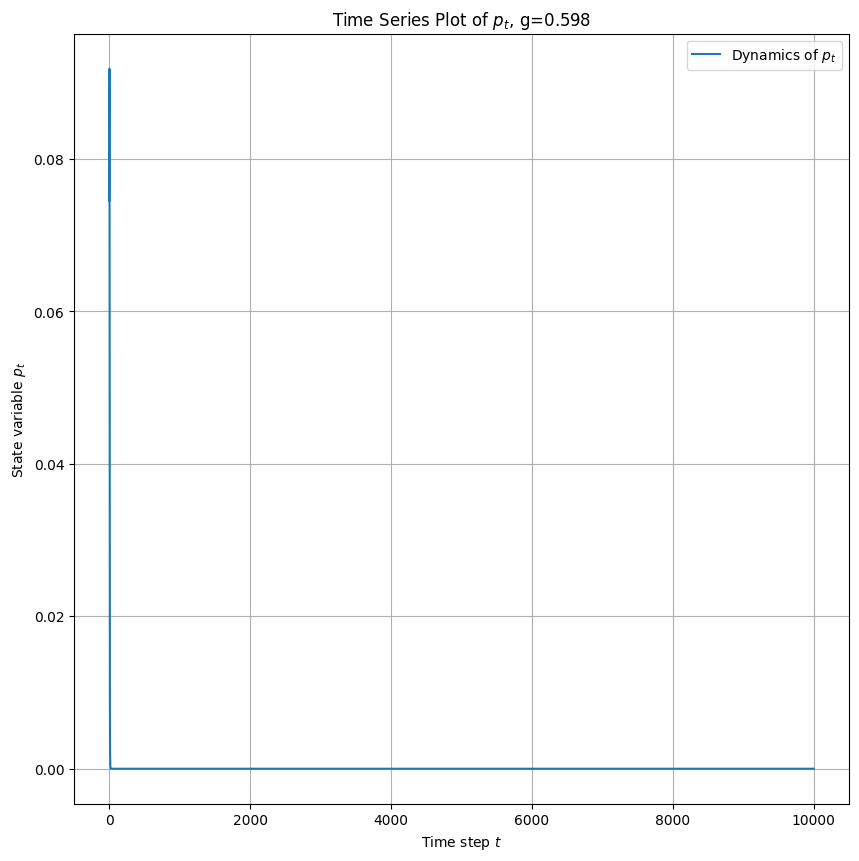

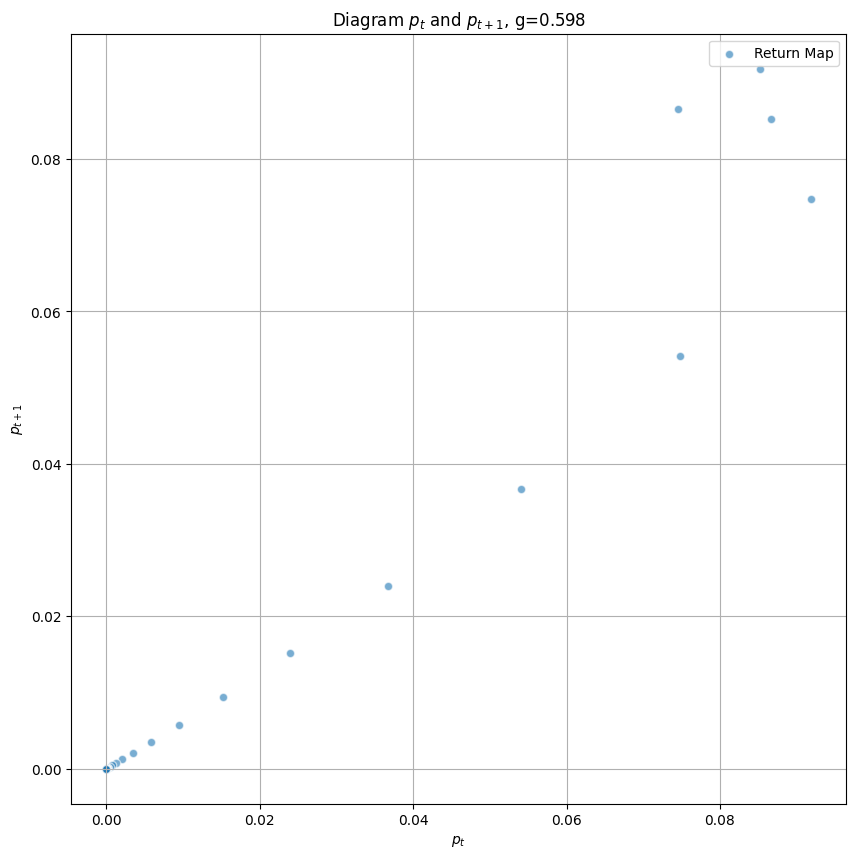

In [45]:
g_chosen = g_lyapunov_min        # As we can see from the previous question, value of g=1 yields a negative Lyapunov exponent.

# Dynamic equation based on the original one
def dynamic_equation(X1, X2, X3, X4, g, R=1.01, v=0.6, alpha=10, a=1, sigma=1, beta=4):
    numerator = np.exp((-X1**2)/alpha)
    denominator = 1 + np.exp((-beta/(2*a*sigma**2))*((X1-v*X2)**2-(X3-X1+g*(X3-X4))**2))
    return (v / R) * X1 + 1/R*((1-v)*X1 + g*(X1-X2)) * (numerator / denominator)

# Generate the dynamics
time_series_length = 10000               # Depth of dynamics, using high resolution
p_t = np.zeros(time_series_length)
p_t[0:4] = initial_condition[0:4]       # Using the same initial condition

# Run the dynamic system
for t in range(3, time_series_length - 1):
    p_t[t + 1] = dynamic_equation(p_t[t], p_t[t - 1], p_t[t - 2], p_t[t - 3], g_chosen)

# Plotting the time series (t, p_t)
plt.figure(figsize=(10, 10))
plt.plot(p_t, label='Dynamics of $p_t$')
plt.xlabel('Time step $t$')
plt.ylabel('State variable $p_t$')
plt.title('Time Series Plot of $p_t$, g=' + str(g_chosen))
plt.legend()
plt.grid(True)
plt.show()

# Plotting the return map (p_t, p_t+1)
plt.figure(figsize=(10, 10))
plt.scatter(p_t[:-1], p_t[1:], alpha=0.6, edgecolors='w', label='Return Map')
plt.xlabel('$p_t$')
plt.ylabel('$p_{t+1}$')
plt.title('Diagram $p_t$ and $p_{t+1}$, g=' + str(g_chosen))
plt.legend()
plt.grid(True)
plt.show()

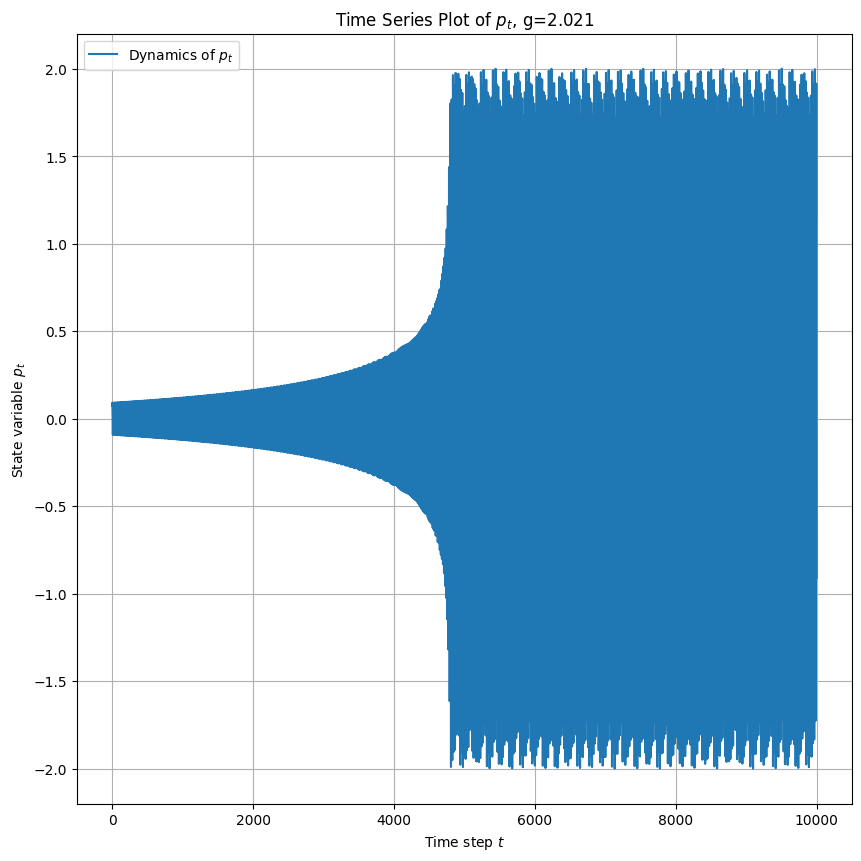

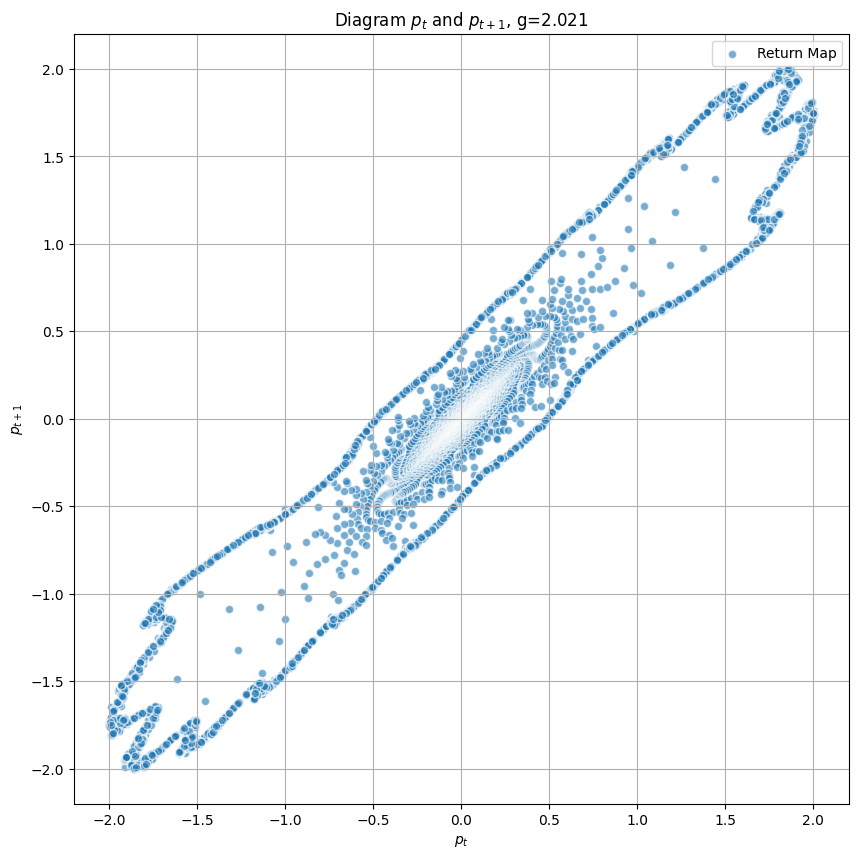

In [46]:
g_chosen = g_lyapunov_zero        # As we can see from the previous question, value of g=2.021 yields a close to zero Lyapunov exponent.

# Dynamic equation based on the original one
def dynamic_equation(X1, X2, X3, X4, g, R=1.01, v=0.6, alpha=10, a=1, sigma=1, beta=4):
    numerator = np.exp((-X1**2)/alpha)
    denominator = 1 + np.exp((-beta/(2*a*sigma**2))*((X1-v*X2)**2-(X3-X1+g*(X3-X4))**2))
    return (v / R) * X1 + 1/R*((1-v)*X1 + g*(X1-X2)) * (numerator / denominator)

# Generate the dynamics
time_series_length = 10000               # Depth of dynamics, using high resolution
p_t = np.zeros(time_series_length)
p_t[0:4] = initial_condition[0:4]       # Using the same initial condition

# Run the dynamic system
for t in range(3, time_series_length - 1):
    p_t[t + 1] = dynamic_equation(p_t[t], p_t[t - 1], p_t[t - 2], p_t[t - 3], g_chosen)

# Plotting the time series (t, p_t)
plt.figure(figsize=(10, 10))
plt.plot(p_t, label='Dynamics of $p_t$')
plt.xlabel('Time step $t$')
plt.ylabel('State variable $p_t$')
plt.title('Time Series Plot of $p_t$, g=' + str(g_chosen))
plt.legend()
plt.grid(True)
plt.show()

# Plotting the return map (p_t, p_t+1)
plt.figure(figsize=(10, 10))
plt.scatter(p_t[:-1], p_t[1:], alpha=0.6, edgecolors='w', label='Return Map')
plt.xlabel('$p_t$')
plt.ylabel('$p_{t+1}$')
plt.title('Diagram $p_t$ and $p_{t+1}$, g=' + str(g_chosen))
plt.legend()
plt.grid(True)
plt.show()

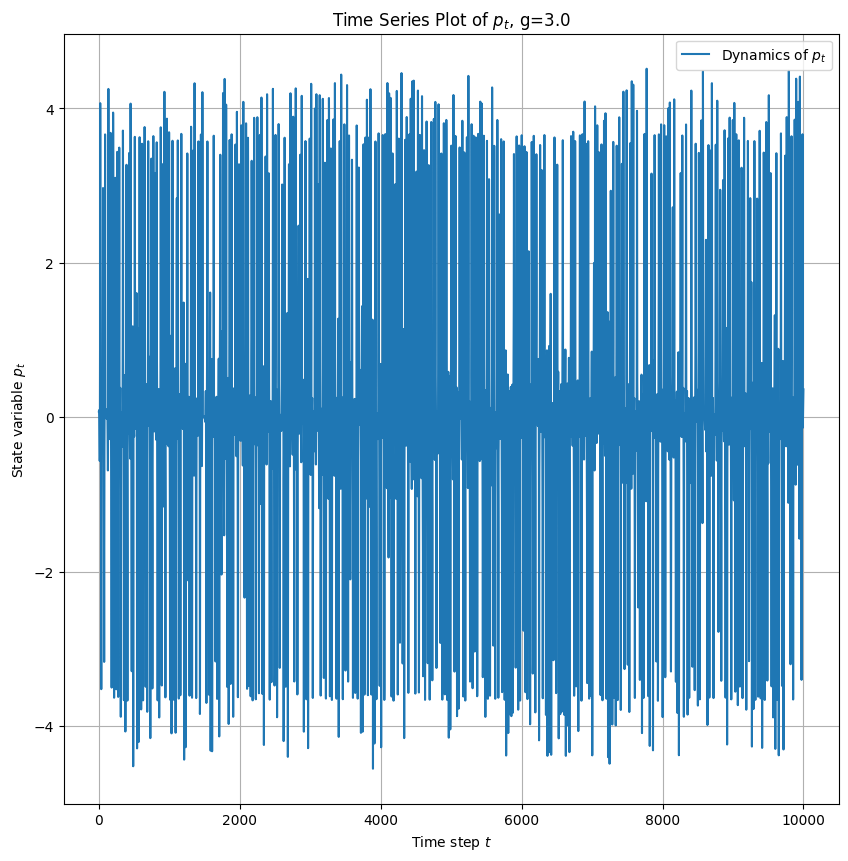

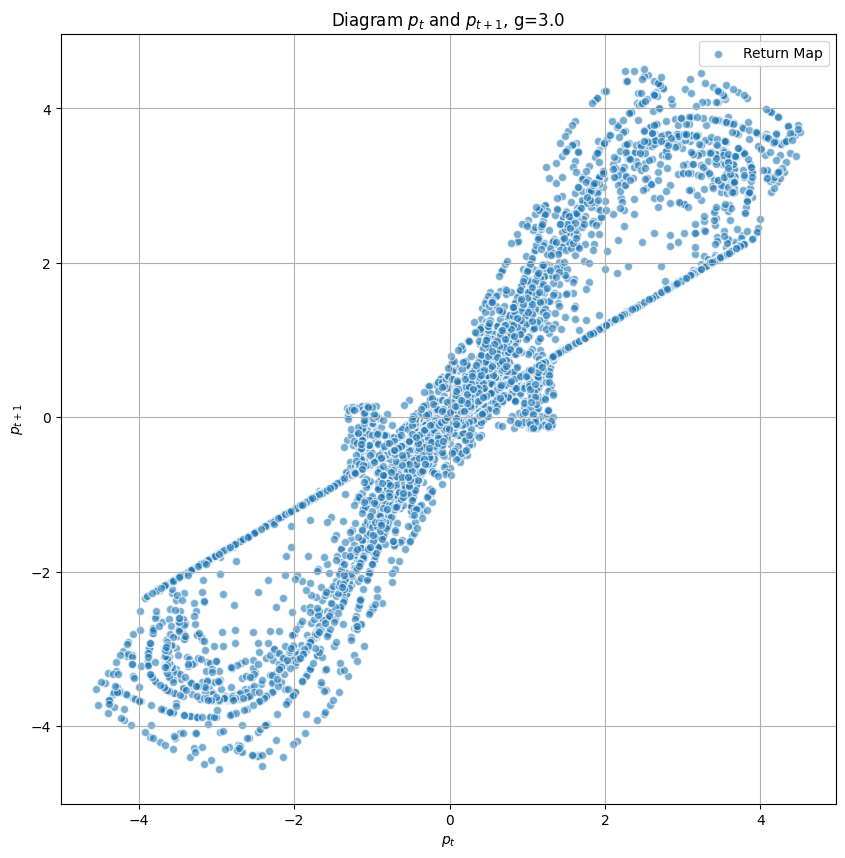

In [47]:
g_chosen = g_lyapunov_max        # As we can see from the previous question, value of g=2.5 yields a positive Lyapunov exponent.

# Dynamic equation based on the original one
def dynamic_equation(X1, X2, X3, X4, g, R=1.01, v=0.6, alpha=10, a=1, sigma=1, beta=4):
    numerator = np.exp((-X1**2)/alpha)
    denominator = 1 + np.exp((-beta/(2*a*sigma**2))*((X1-v*X2)**2-(X3-X1+g*(X3-X4))**2))
    return (v / R) * X1 + 1/R*((1-v)*X1 + g*(X1-X2)) * (numerator / denominator)

# Generate the dynamics
time_series_length = 10000               # Depth of dynamics, using high resolution
p_t = np.zeros(time_series_length)
p_t[0:4] = initial_condition[0:4]       # Using the same initial condition

# Run the dynamic system
for t in range(3, time_series_length - 1):
    p_t[t + 1] = dynamic_equation(p_t[t], p_t[t - 1], p_t[t - 2], p_t[t - 3], g_chosen)

# Plotting the time series (t, p_t)
plt.figure(figsize=(10, 10))
plt.plot(p_t, label='Dynamics of $p_t$')
plt.xlabel('Time step $t$')
plt.ylabel('State variable $p_t$')
plt.title('Time Series Plot of $p_t$, g=' + str(g_chosen))
plt.legend()
plt.grid(True)
plt.show()

# Plotting the return map (p_t, p_t+1)
plt.figure(figsize=(10, 10))
plt.scatter(p_t[:-1], p_t[1:], alpha=0.6, edgecolors='w', label='Return Map')
plt.xlabel('$p_t$')
plt.ylabel('$p_{t+1}$')
plt.title('Diagram $p_t$ and $p_{t+1}$, g=' + str(g_chosen))
plt.legend()
plt.grid(True)
plt.show()